## I passed the "Data Analyst" exam on the DataCamp platform and I want to share with you my aproach to the project.

### Here is the introductory information and requirements to the analysis from the "client".

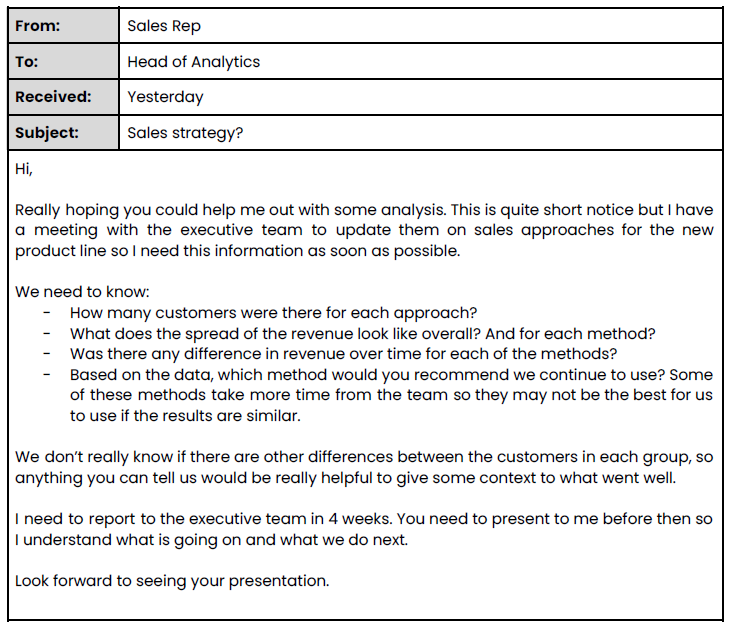

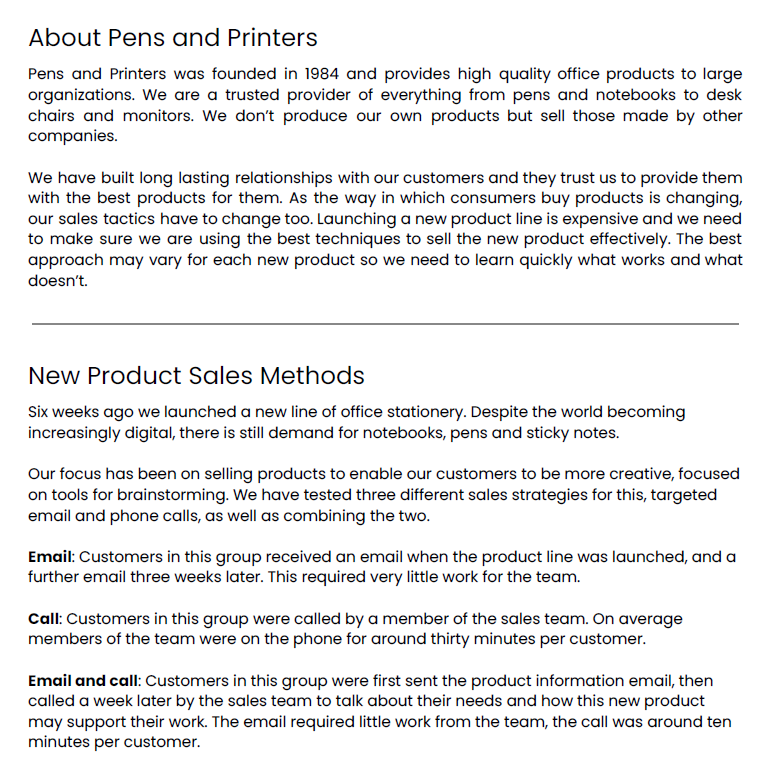

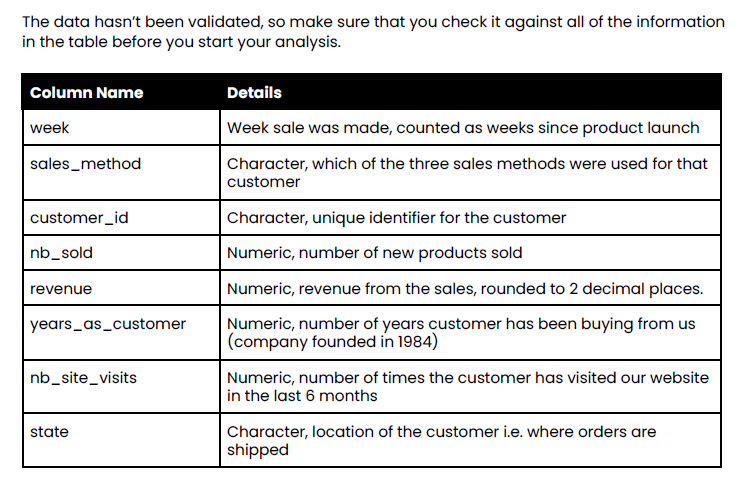

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/product-sales/product_sales.csv')
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


### The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week: 6 weeks without missing values, same as the description. No cleaning is needed.
- sales_method: 5 methods were discovered. The description states 3 methods. Pairs {"Email" : "email"} and {"Email + Call" : "em + call"} were joined.
- customer_id: unique identifier without missing values or duplicates, same as the description. No cleaning is needed.
- nb_sold: number of new products sold (in range from 7 to 16) without missing values, same as the description. No cleaning is needed.
- revenue: numeric values, 1074 missing values were found and cleaned (7.16% of dataset).
- years_as_customer: numeric values, number of years customer has been buying from the company (since 1984). Two rows with strange values were found and cleaned ('47', '63').
- nb_site_visits: numeric values without missing values, same as the description. No cleaning is needed.
- state: location of the customer, character, no missing values, same as the description. No cleaning is needed.
- After the data validation, the dataset contains 13924 rows and 8 columns without missing values and duplicates.

### After the data validation, the dataset contains 13924 rows and 8 columns without missing values and duplicates.

In [2]:
df.replace(to_replace='em + call', value= 'Email + Call', inplace = True)
df.replace(to_replace='email', value= 'Email', inplace = True)
df.dropna(inplace=True)
df.drop(index = list(df[df['years_as_customer'] > 40].index), inplace=True)

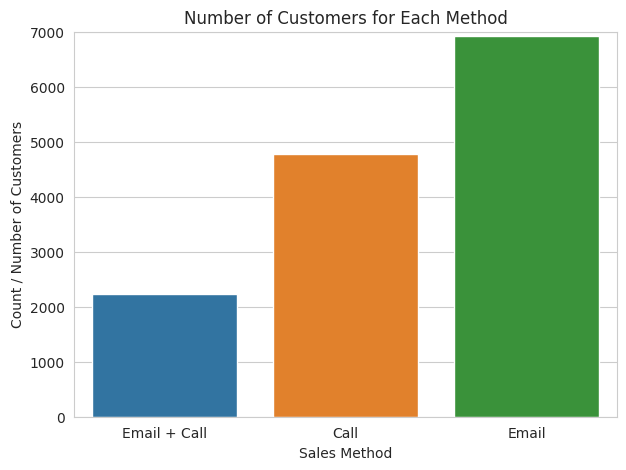

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sales_method')
plt.title('Number of Customers for Each Method')
plt.ylabel('Count / Number of Customers')
plt.xlabel('Sales Method')
plt.ylim(0, 7000)
plt.show()

From the plot we see that we have the largest number of clients in the sales method "Email", followed by "Call" method. Here is specific numbers of customers by each method:

- Email 6921
- Call 4780
- Email + Call 2223

In [4]:
df['sales_method'].value_counts()

sales_method
Email           6921
Call            4780
Email + Call    2223
Name: count, dtype: int64

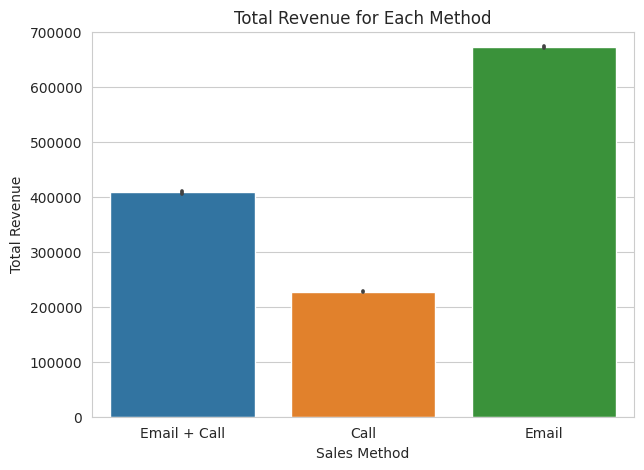

In [5]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='sales_method', y='revenue', estimator='sum')
plt.title('Total Revenue for Each Method')
plt.ylabel('Total Revenue')
plt.xlabel('Sales Method')
plt.ylim(0, 700000)
plt.show()

I also found it important to provide information on the total amount of revenue for each method. We see that despite the fact that we have fewer clients in the "Email + Call" category, the total revenue for them is approximately twice as much as for the "Call" category.

Based on this information, these two methods are the most interesting for us: "Email + Call", "Email". These methods consume less resources (as follows from your letter) and at the same time bring more profit for us and clients in general.

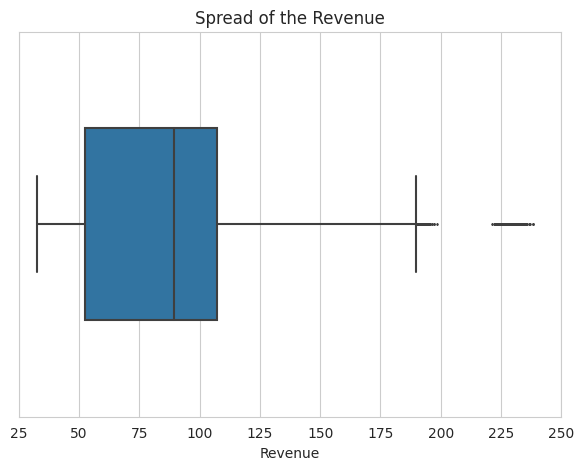

In [6]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='revenue', width=0.5, fliersize=1)
plt.xlabel('Revenue')
plt.title('Spread of the Revenue')
plt.xticks(ticks=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.xlim(25, 250)
plt.show()

Analyzing the spread of revenue across the entire database, we see that the largest percentage of revenue lies between 50 and 125. The average value is revenue of approximately 90. Revenue values greater than 200 are considered abnormal outliers.

In [7]:
mean = df['revenue'].quantile(0.5)
min = df['revenue'].quantile(0)
max = df['revenue'].quantile(1)
first_quartile = df['revenue'].quantile(0.25)
third_quartile = df['revenue'].quantile(0.75)

print('min = {}\nfirst_quartile = {}\nmean = {} \nthird_quartile = {}\nmax = {}'.format(min, first_quartile, mean, third_quartile, max))

min = 32.54
first_quartile = 52.47
mean = 89.5 
third_quartile = 107.33
max = 238.32


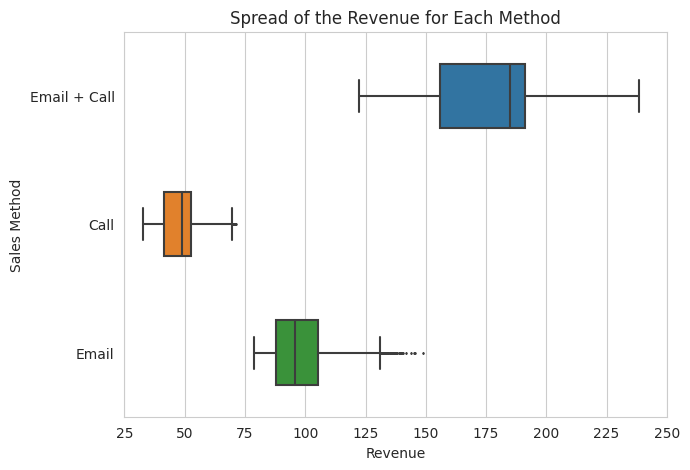

In [8]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='revenue', y='sales_method', width=0.5, fliersize=1)
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.title('Spread of the Revenue for Each Method')
plt.xticks(ticks=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.xlim(25, 250)
plt.show()

The revenue box plot by sales method shows us new important data for analysis. An interesting fact is that the "Email + Call" method shows the best results in terms of average revenue. The “Email” method has the mean indicators across the three groups. Confirming our previous assumptions, the "Call" method is the least profitable in terms of average revenue indicators.

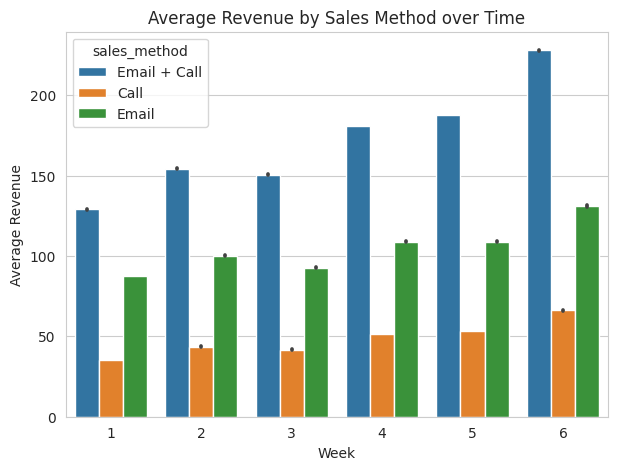

In [9]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, y='revenue', x='week', hue='sales_method', estimator='mean')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Sales Method over Time')
plt.show()

From an analysis of average revenue by sales category over time, we see that average revenue has been increasing over time across all categories.

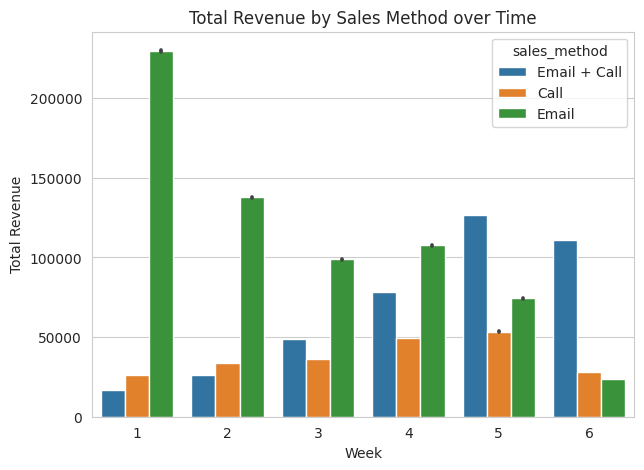

In [10]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='week', hue='sales_method', y='revenue', estimator='sum')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Method over Time')
plt.show()

Total revenue by sales method over time is perhaps of even greater interest to us. We see that for the "Email" category, total revenues are significantly decreasing, while revenues for the "Email + Call" and "Call" categories, on the contrary, are increasing.

We can conclude that in the first four weeks the sales department can concentrate on mail sales and in the subsequent weeks give due attention to the combined method of sales, since we have found that it shows the best results relative to average revenue.

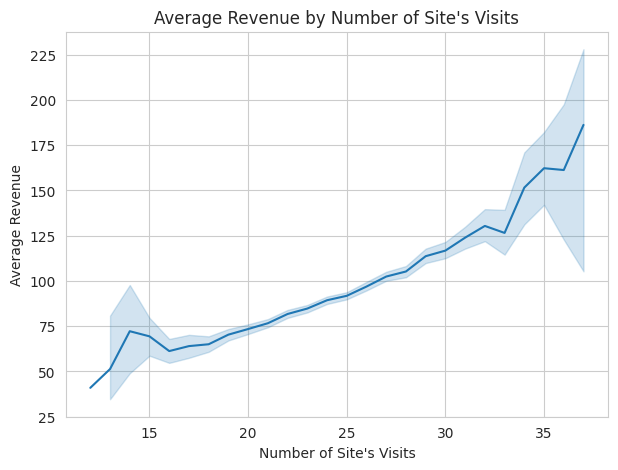

In [11]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df, x='nb_site_visits', y='revenue')
plt.xlabel("Number of Site's Visits")
plt.ylabel('Average Revenue')
plt.title("Average Revenue by Number of Site's Visits")
plt.show()

I also would like to draw your attention to an interesting analysis of the ratio of average price and average revenue per buyer. We see that the more times a customer visits the site, the greater the average revenue from this customer. Perhaps these observations may be important for our future work, highlighting further improvments that can be made to the website.

### Business metrics

Since our goal is to determine the best sales method in terms of resources spent and profit generated, I would recommend combining the two best methods depending on the week of the sale: "Email + Call" and "Email".

We found that the "Call" method has the lowest expenditure of time resources (based on your letter) and at the same time loses in several revenue indicators: average revenue and total revenue.

The "Email" and "Call + Email" methods, on the other hand, have a number of different advantages. While "Email" method provides us with the largest number of clients, the "Email + Call" method has significant advantages in terms of average revenue.

### Recommendations

- Focus on combining two methods:
    - In the first four weeks of sales, you should give preference to the "Email" method
    - In the coming weeks, you can further emphasize the " Email + Call" method
    - Using key metrics to monitor whether there is a strong sign to see the revenues will increase.
    

- Data Collection for in-depth analysis - improve data quality by providing missing values.


- Draw attention to site's visits analytics